<a href="https://colab.research.google.com/github/erick-huang15/Food-Sales-Predictions/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

data_path = '/content/drive/MyDrive/CD: Project 1/sales_predictions.csv'
data = pd.read_csv(data_path)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#How many rows and columns? 
#What are the datatypes of each variable?

In [37]:
data.info() # this is to get a summary of the dataset
datatype = data.dtypes # this is to check the datatypes of each variable
datatype # show the datatype that is stored in datatype variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Are there any duplicates? If so, drop any duplicates

In [38]:
data.duplicated().sum() # this is to check the duplicate data in the dataset

0

# Identify missing values

In [58]:
null_values = data.isna().sum() # this is to identify missing values
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####### I will drop the null values since there are a total of 2 data type out of 12 that has null values (missing values) in the data sets

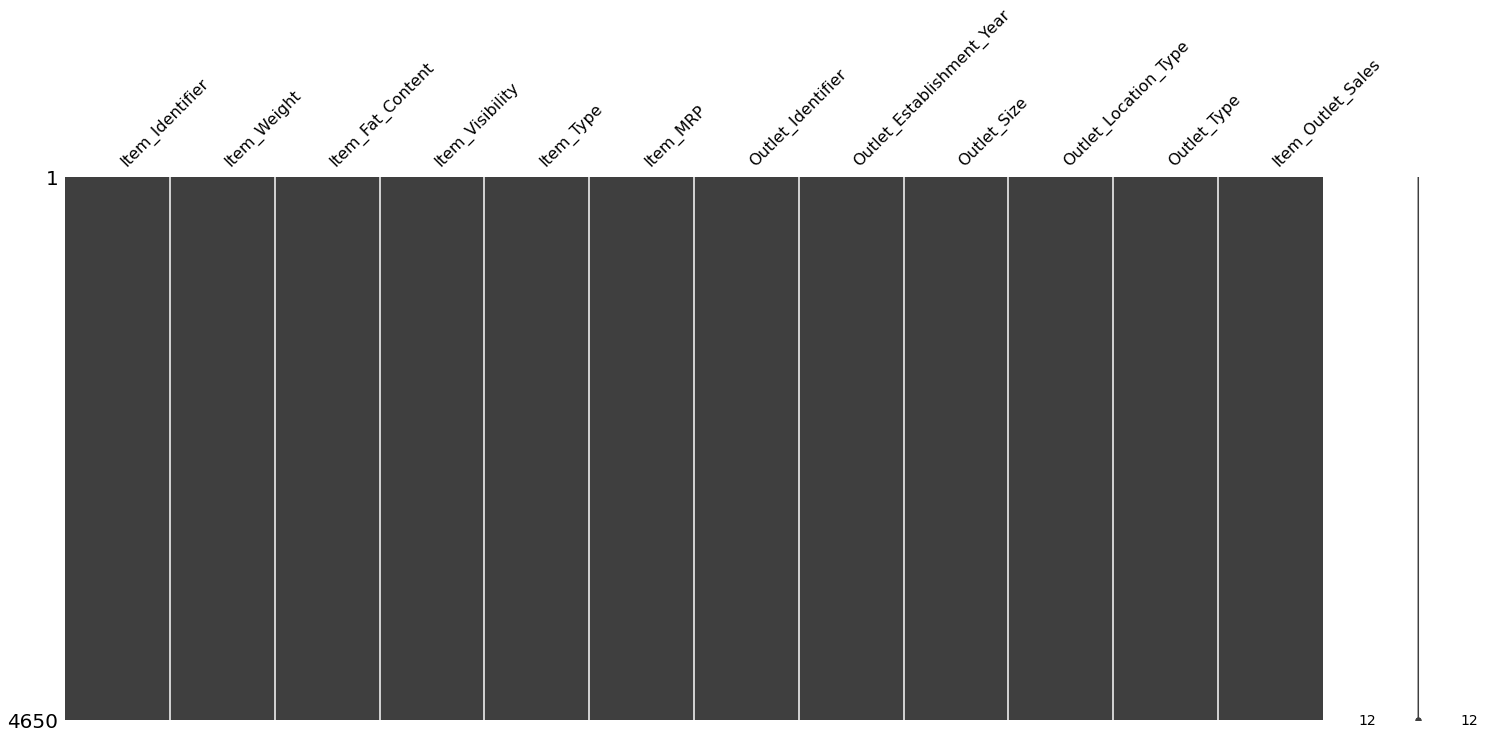

In [72]:
import missingno
data_clean = data.dropna(subset=['Item_Weight','Outlet_Size'],how='any')
missingno.matrix(data_clean)

# Find and Fix any inconsistent vategories of data

In [91]:
f_correct = {'reg':'Regular'} # this is to correct reg to Regular
lf1_correct = {'LF':'Low Fat'} # this is to correct LF to Low Fat 
lf2_correct = {'low fat':'Low Fat'} # this is to correct lower case to upper case 
data_clean['Item_Fat_Content'] = data_clean['Item_Fat_Content'].replace(f_correct)
data_clean['Item_Fat_Content'] = data_clean['Item_Fat_Content'].replace(lf1_correct)
data_clean['Item_Fat_Content'] = data_clean['Item_Fat_Content'].replace(lf2_correct)
data_clean['Item_Fat_Content'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [92]:
data_clean.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000
